# SAC Season by Season Analyzer

notebook to analyze SAC seasons, and specifically the cali crown rivalry.

In [1]:
import os, sys, subprocess, json, time
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xkcd_colors = sns.xkcd_rgb
GOLLY_GRAY = "#272B30"

In [3]:
CUP = 'hellmouth'
ABBR = 'SAC'

## Loading Match Data

Start by loading match data from the `data/` dir:

In [4]:
def run_cmd(cmd_str):
    child = subprocess.Popen(cmd_str, shell=True, stdout=subprocess.PIPE)
    output = child.communicate()[0].decode()
    return output

print(run_cmd('ls ../data/'))

clone.sh
gollyx-dragon-data
gollyx-hellmouth-data
gollyx-klein-data
gollyx-pseudo-data
gollyx-rainbow-data
gollyx-star-data
gollyx-toroidal-data



## Method to load regular season data

user specifies the cup and the season.

In [5]:
def fetch_season_data(which_season0):
    seas_file = os.path.join('..', 'data', f'gollyx-{CUP}-data', f'season{which_season0}', 'season.json')
    if not os.path.exists(seas_file):
        raise Exception(f"Error: season {which_season0} not valid: {seas_file} does not exist")
    with open(seas_file, 'r') as f:
        season0_seas = json.load(f)
    return season0_seas

## Method to filter regular season data on a single team

In [6]:
def filter_season_data(seas_data, team_abbr):
    team_abbr = team_abbr.upper()
    team_seas = []
    for day in seas_data:
        for game in day:
            if game['team1Abbr'] == team_abbr or game['team2Abbr'] == team_abbr:
                team_seas.append(game)
                break
    return team_seas

## Test drive

In [7]:
sac = filter_season_data(fetch_season_data(3), ABBR)
print(len(sac))
pprint(sac[0])

49
{'day': 0,
 'gameid': '5b2ff315-22e5-4546-af93-3a83557e97a3',
 'generations': 1821,
 'isPostseason': False,
 'league': 'Hot League',
 'map': {'cellSize': 7,
         'columns': 120,
         'initialConditions1': '[{"25":[89,90,93,94,95]},{"26":[92]},{"27":[90]}]',
         'initialConditions2': '[{"75":[27]},{"76":[29]},{"77":[26,27,30,31,32]}]',
         'mapName': 'The Quad',
         'mapZone1Name': 'Quadrant I',
         'mapZone2Name': 'Quadrant II',
         'mapZone3Name': 'Quadrant III',
         'mapZone4Name': 'Quadrant IV',
         'patternName': 'twoacorn',
         'rows': 100,
         'url': '?s1=[{"25":[89,90,93,94,95]},{"26":[92]},{"27":[90]}]&s2=[{"75":[27]},{"76":[29]},{"77":[26,27,30,31,32]}]'},
 'season': 3,
 'team1Abbr': 'DET',
 'team1Color': '#9963ab',
 'team1Name': 'Detroit Grape Chews',
 'team1Score': 286,
 'team1WinLoss': [0, 0],
 'team2Abbr': 'SAC',
 'team2Color': '#ffb627',
 'team2Name': 'Sacramento Boot Lickers',
 'team2Score': 54,
 'team2WinLoss': [0,

## Method to assemble schedule tuples - opponent, outcome, score

Extract data from the full game data structure to compile a simpler tuple with opponent, outcome, and score.

In [8]:
def schedule_tuples(team_abbr, season0):
    team_abbr = team_abbr.upper()
    dat = filter_season_data(fetch_season_data(season0), team_abbr)
    schedule_tups = []
    for game in dat:
        if 'gameid' in game.keys():
            gameid = game['gameid']
        else:
            gameid = game['id']
        if game['team1Abbr'] == team_abbr:
            other_team_name = game['team2Name']
            other_team_abbr = game['team2Abbr']
            
            our_points = game['team1Score']
            other_points = game['team2Score']
            
            our_wl = game['team1WinLoss']
            other_wl = game['team2WinLoss']
            
            if game['team2Score'] > game['team1Score']:
                outcome = 'L'
            else:
                outcome = 'W'
            homeaway = 'H'

        elif game['team2Abbr'] == team_abbr:
            other_team_name = game['team1Name']
            other_team_abbr = game['team1Abbr']
            
            our_points = game['team2Score']
            other_points = game['team1Score']
            
            our_wl = game['team2WinLoss']
            other_wl = game['team1WinLoss']
            
            if game['team1Score'] > game['team2Score']:
                outcome = 'L'
            else:
                outcome = 'W'
            homeaway = 'A'
            
        else:
            raise Exception(f"Could not find team {team_abbr} in season {season0}")

        tup = (gameid, other_team_name, other_team_abbr, homeaway, outcome, our_points, other_points, our_wl, other_wl)
        schedule_tups.append(tup)
    return schedule_tups

In [9]:
def print_sched_tuples(team_abbr, season0):
    tups = schedule_tuples(team_abbr, season0)
    print("")
    print(f"Schedule for {team_abbr.upper()}, Season {season0+1}")
    print("-"*40)
    for tup in tups:
        (gameid, oppname, oppabbr, homeaway, outcome, ourpts, theirpts, ourwl, theirwl) = tup
        if homeaway=='H':
            matchup = f"{team_abbr:4} ({ourwl[0]:2} - {ourwl[1]:2}) vs {oppabbr:4} ({theirwl[0]:2} - {theirwl[1]:2})"
        elif homeaway=='A':
            matchup = f"{team_abbr:4} ({ourwl[0]:2} - {ourwl[1]:2})  @ {oppabbr:4} ({theirwl[0]:2} - {theirwl[1]:2})"
        #print(f"{gameid}")
        print(f"    {gameid} {matchup}\t{outcome:4}\t{ourpts:4} - {theirpts:4}")
    print("")

In [10]:
print_sched_tuples(ABBR, 3)


Schedule for SAC, Season 4
----------------------------------------
    5b2ff315-22e5-4546-af93-3a83557e97a3 SAC  ( 0 -  0)  @ DET  ( 0 -  0)	L   	  54 -  286
    113f7f16-a22f-466c-a07e-552f26de04b9 SAC  ( 0 -  1) vs DET  ( 1 -  0)	W   	 157 -   57
    72ca6eb2-35bc-4dbb-88e3-e9131ee184b8 SAC  ( 1 -  1)  @ DECO ( 1 -  1)	W   	 143 -  123
    0dabcc7e-36e5-4dbc-afcd-19f2a8b457b6 SAC  ( 2 -  1) vs DECO ( 1 -  2)	L   	  75 -  100
    b6e23135-e0b7-4a5c-bbf8-c35e9b30dfdf SAC  ( 2 -  2)  @ DECO ( 2 -  2)	L   	 137 -  203
    e9fbc344-9d88-4282-9a67-564809623432 SAC  ( 2 -  3) vs DECO ( 3 -  2)	W   	 180 -  103
    572c06a9-8dff-413e-90cb-b9bee51f6411 SAC  ( 3 -  3)  @ MILF ( 2 -  4)	L   	  72 -  232
    ba841c66-28b7-4d35-a4bd-f073bc8a226d SAC  ( 3 -  4) vs MILF ( 3 -  4)	L   	  90 -  199
    44b37bd8-0485-4331-a7c1-744a11d3c2b7 SAC  ( 3 -  5)  @ SFBS ( 3 -  5)	W   	 105 -   74
    7e1c2d00-d986-44ee-be49-5c1eca02ef37 SAC  ( 4 -  5) vs SFBS ( 3 -  6)	W   	 299 -   14
    894c5c54-9749-42d

This game looks interesting: 

> bcf3c48f-3563-472b-b5e1-bf0b078b3a23 SAC  (11 - 13)  @ DET  (16 -  8)	W   	 183 -  182

Once SAC won, they never lost more than two in a row.

In [11]:
sac_det_game = sac[24]
pprint(sac_det_game['gameid'])
print(", ".join(sac_det_game['map'].keys()))

'bcf3c48f-3563-472b-b5e1-bf0b078b3a23'
patternName, mapName, mapZone1Name, mapZone2Name, mapZone3Name, mapZone4Name, initialConditions1, initialConditions2, url, rows, columns, cellSize


## Game Analysis

In [12]:
import gollyx_python

class HellmouthGOL_Instrumented(gollyx_python.manager.HellmouthGOL):
    live_counts_keys = ['generation','victoryPct','liveCells1','liveCells2', 'last3']
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.live_counts = []
        new_stats = self.life.get_stats()
        new_live_count = {k : new_stats[k] for k in self.live_counts_keys}
        self.live_counts.append(new_live_count)

    def next_step(self):
        new_stats = super().next_step()
        new_live_count = {k : new_stats[k] for k in self.live_counts_keys}
        self.live_counts.append(new_live_count)
        return new_stats

In [13]:
ic1 = sac_det_game['map']['initialConditions1']
ic2 = sac_det_game['map']['initialConditions2']

In [14]:
inst = HellmouthGOL_Instrumented(
    s1=ic1,
    s2=ic2,
    rows=100,
    columns=120,
    halt=True,
)

In [15]:
N = 0

tic = time.time()
while inst.running:
    N += 1
    inst.next_step()
toc = time.time()
diff = toc-tic

print(f"{N} steps took {diff:0.2f} s")

1239 steps took 77.33 s


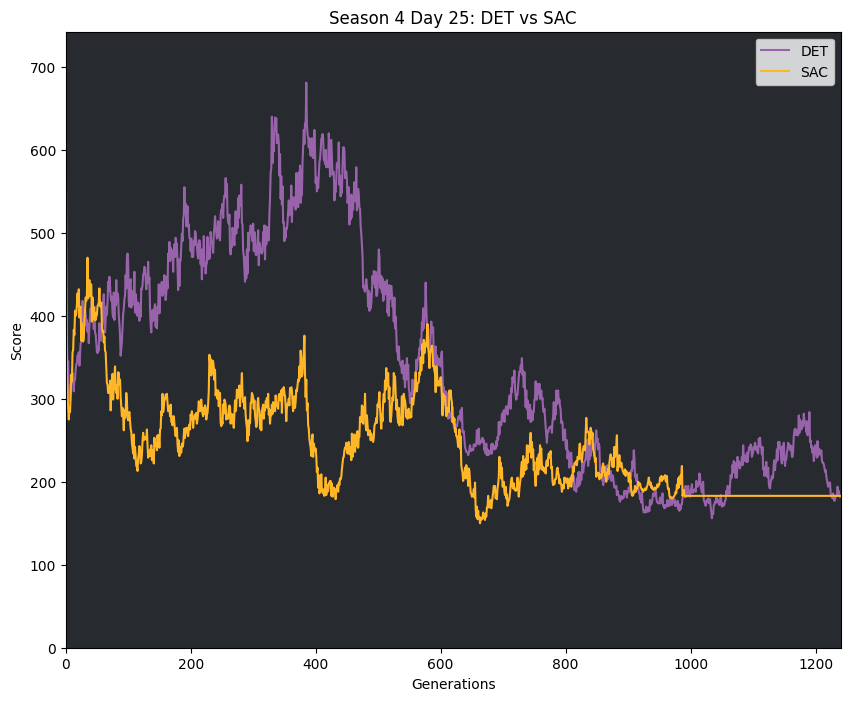

In [31]:
t1n = sac_det_game['team1Name']
t1a = sac_det_game['team1Abbr']
t1c = sac_det_game['team1Color']

t2n = sac_det_game['team2Name']
t2a = sac_det_game['team2Abbr']
t2c = sac_det_game['team2Color']

s1 = [d['liveCells1'] for d in inst.live_counts]
s2 = [d['liveCells2'] for d in inst.live_counts]

x = range(0, len(s1))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_xlim(0, len(x))
ax.set_ylim(0, 1.05*max(max(s1), max(s2)))
#ax.set_xlim(500, len(x))
#ax.set_ylim(50, 300)

ax.plot(x, s1, label = t1a, color = t1c)
ax.plot(x, s2, label = t2a, color = t2c)

ax.set_facecolor(GOLLY_GRAY)
ax.legend()

ax.set_title("Season 4 Day 25: DET vs SAC")
ax.set_xlabel("Generations")
ax.set_ylabel("Score")
plt.show()

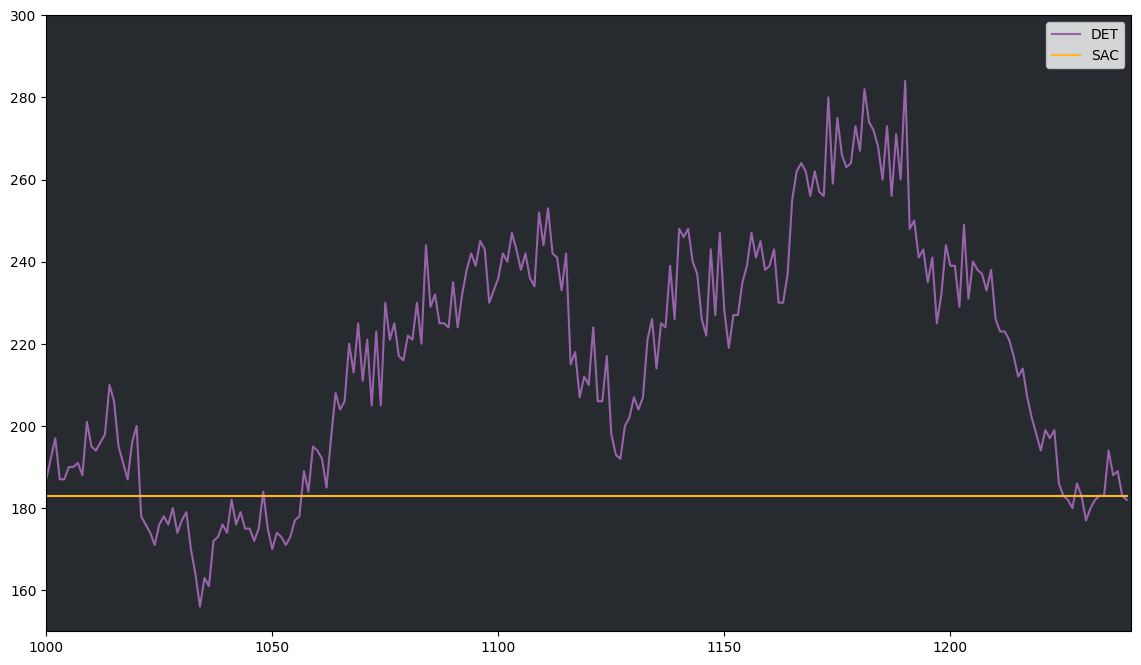

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.set_xlim(1000, len(x))
ax.set_ylim(150, 300)

ax.plot(x, s1, label = t1a, color = t1c)
ax.plot(x, s2, label = t2a, color = t2c)

ax.set_facecolor(GOLLY_GRAY)
ax.legend()
plt.show()

Lore idea - SAC discovered they were a team of destiny

## Continuing Season Analysis

In [18]:
print_sched_tuples(ABBR, 13)


Schedule for SAC, Season 14
----------------------------------------
    14bca23d-b190-43f3-84b1-e71383b7f26d SAC  ( 0 -  0)  @ MILF ( 0 -  0)	W   	 124 -   72
    eedde0a7-023a-4aa6-bf6b-38e0954111cc SAC  ( 1 -  0) vs MILF ( 0 -  1)	W   	 340 -   82
    700626d7-5586-47d4-9b3b-03f2dc2ec3f0 SAC  ( 2 -  0)  @ DET  ( 1 -  1)	L   	  42 -  236
    a29f1999-2a7a-434b-aa22-439c7503647a SAC  ( 2 -  1) vs DET  ( 2 -  1)	L   	 146 -  189
    89bc67a9-b5c8-4def-b73b-211dd15a6eb6 SAC  ( 2 -  2)  @ DET  ( 3 -  1)	W   	 142 -  124
    1c2d079e-dd34-43a3-acf7-c0d47fe802b0 SAC  ( 3 -  2) vs DET  ( 3 -  2)	L   	 112 -  201
    214eabca-b842-41cf-90c9-08e5e8488da9 SAC  ( 3 -  3)  @ MILF ( 1 -  5)	W   	 230 -    3
    c205f5fb-6e97-4a0b-be5d-818cb02a153d SAC  ( 4 -  3) vs MILF ( 1 -  6)	W   	 168 -  140
    44fd4a31-21ae-4291-a781-918f9522dd14 SAC  ( 5 -  3)  @ MILF ( 1 -  7)	L   	 130 -  194
    09df0e7b-eacb-4bf9-b504-4ac9272387f7 SAC  ( 5 -  4) vs MILF ( 2 -  7)	L   	 154 -  210
    96cdeb8d-038c-4f

In [19]:
print_sched_tuples(ABBR, 20)


Schedule for SAC, Season 21
----------------------------------------
    5af8d19f-9a17-46c7-a84c-c83eceec5cf5 SAC  ( 0 -  0)  @ ABQ  ( 0 -  0)	W   	 154 -  123
    3e39abc1-70e0-4cbb-b112-ff1999f085c5 SAC  ( 1 -  0) vs ABQ  ( 0 -  1)	W   	 291 -   20
    61498a07-bfcd-4c48-a0f2-02874a23efa8 SAC  ( 2 -  0) vs BB   ( 0 -  2)	W   	 218 -  187
    632738fe-4686-40c2-933b-e85806bbc4ad SAC  ( 3 -  0)  @ BB   ( 0 -  3)	W   	 145 -   70
    8c51aeb2-427a-4c8f-9cfa-5a355cf3a8b7 SAC  ( 4 -  0)  @ ABQ  ( 1 -  3)	L   	 111 -  184
    4084e242-4dbe-46c9-89c4-52e49e77e45b SAC  ( 4 -  1) vs ABQ  ( 2 -  3)	L   	  43 -  255
    fc5f4f6c-f8b1-4c27-a7d7-38e3807bdf6a SAC  ( 4 -  2)  @ SFBS ( 3 -  3)	W   	 244 -   41
    f671c3f4-00fa-4f5e-937c-eb856066f1ba SAC  ( 5 -  2) vs SFBS ( 3 -  4)	W   	  74 -   50
    cac7fe17-d762-4d99-90a2-085abf911ba2 SAC  ( 6 -  2)  @ DET  ( 5 -  3)	W   	 209 -  129
    3c23768f-8173-4a71-8cf8-124de982f485 SAC  ( 7 -  2) vs DET  ( 5 -  4)	L   	 105 -  235
    e2a746b7-29b1-4a

## Method to assemble matchup tuples - specific opponent, outcome, score

In [20]:
def matchup_tuples(team_abbr, opp_abbr, season0):
    team_abbr, opp_abbr = team_abbr.upper(), opp_abbr.upper()
    dat = filter_season_data(fetch_season_data(season0), team_abbr)
    matchup_tups = []
    for game in dat:
        skip = False
        if 'gameid' in game.keys():
            gameid = game['gameid']
        else:
            gameid = game['id']
        if game['team1Abbr'] == team_abbr and game['team2Abbr'] == opp_abbr:
            other_team_name = game['team2Name']
            other_team_abbr = game['team2Abbr']
            
            our_points = game['team1Score']
            other_points = game['team2Score']
            
            our_wl = game['team1WinLoss']
            other_wl = game['team2WinLoss']
            
            if game['team2Score'] > game['team1Score']:
                outcome = 'L'
            else:
                outcome = 'W'
            homeaway = 'H'

        elif game['team2Abbr'] == team_abbr and game['team1Abbr'] == opp_abbr:
            other_team_name = game['team1Name']
            other_team_abbr = game['team1Abbr']
            
            our_points = game['team2Score']
            other_points = game['team1Score']
            
            our_wl = game['team2WinLoss']
            other_wl = game['team1WinLoss']
            
            if game['team1Score'] > game['team2Score']:
                outcome = 'L'
            else:
                outcome = 'W'
            homeaway = 'A'
            
        else:
            skip = True
            
        if not skip:
            tup = (gameid, other_team_name, other_team_abbr, homeaway, outcome, our_points, other_points, our_wl, other_wl)
            matchup_tups.append(tup)
    return matchup_tups

In [21]:
def print_matchup_tuples(team_abbr, opp_abbr, season0):
    tups = matchup_tuples(team_abbr, opp_abbr, season0)
    print("")
    print(f"Schedule for {team_abbr.upper()} vs. {opp_abbr.upper()}, Season {season0+1}")
    wins = sum([1 for tup in tups if tup[3]=='W'])
    losses = sum([1 for tup in tups if tup[3]=='L'])
    print(f"W-L record for {team_abbr}: {wins}-{losses}")
    for tup in tups:
        (gameid, oppname, oppabbr, homeaway, outcome, ourpts, theirpts, ourwl, theirwl) = tup
        if homeaway=='H':
            matchup = f"{team_abbr:4} ({ourwl[0]:2} - {ourwl[1]:2}) vs {oppabbr:4} ({theirwl[0]:2} - {theirwl[1]:2})"
        elif homeaway=='A':
            matchup = f"{team_abbr:4} ({ourwl[0]:2} - {ourwl[1]:2})  @ {oppabbr:4} ({theirwl[0]:2} - {theirwl[1]:2})"
        print(f"    {gameid} {matchup}\t{outcome:4}\t{ourpts:4} - {theirpts:4}")
    print("")

## Cali Crown SAC-SFBS

In [22]:
print_matchup_tuples(ABBR, 'SFBS', 3)


Schedule for SAC vs. SFBS, Season 4
W-L record for SAC: 0-0
    44b37bd8-0485-4331-a7c1-744a11d3c2b7 SAC  ( 3 -  5)  @ SFBS ( 3 -  5)	W   	 105 -   74
    7e1c2d00-d986-44ee-be49-5c1eca02ef37 SAC  ( 4 -  5) vs SFBS ( 3 -  6)	W   	 299 -   14
    894c5c54-9749-42da-bb9c-35f9f3294d01 SAC  ( 5 -  5)  @ SFBS ( 3 -  7)	W   	 205 -  104
    70e366d9-ce4d-4919-bf11-5b21979c65bb SAC  ( 6 -  5) vs SFBS ( 3 -  8)	L   	  74 -  197
    915c9710-6232-4727-8c65-4fa0a9af32b5 SAC  ( 8 - 10)  @ SFBS ( 9 -  9)	W   	 125 -   45
    cf9e7071-a2c5-475c-a2d2-f717261207be SAC  ( 9 - 10) vs SFBS ( 9 - 10)	W   	 264 -   91
    fa737e71-2f6c-4495-b669-421b2d1e04d5 SAC  (10 - 10)  @ SFBS ( 9 - 11)	L   	  35 -  211
    469961fd-eac2-495c-bd46-bab447e455a3 SAC  (10 - 11) vs SFBS (10 - 11)	L   	 136 -  150



In [23]:
for season0 in range(0, 3):
    print_matchup_tuples(ABBR, 'SFBS', season0)


Schedule for SAC vs. SFBS, Season 1
W-L record for SAC: 0-0
    dca16f39-59f6-4cc0-8349-95be133aab48 SAC  ( 8 -  8) vs SFBS (11 -  5)	L   	  39 -   78
    e076e675-9f6e-42c9-abc7-5e443f9a5422 SAC  ( 8 -  9)  @ SFBS (12 -  5)	L   	  29 -  220
    d7d08d70-ce4b-4dea-9a16-94f2f810feda SAC  ( 8 - 10)  @ SFBS (13 -  5)	L   	  11 -  173
    26f759c3-b0a2-4a6a-8a82-2033913f4e2f SAC  ( 8 - 11) vs SFBS (14 -  5)	W   	 161 -   88
    2b6da67b-ddaf-4870-bd08-da7421f761a3 SAC  (12 - 12)  @ SFBS (16 -  8)	L   	  55 -  205
    9c71a8ef-de0e-4a9e-927e-257db8f59a80 SAC  (12 - 13) vs SFBS (17 -  8)	W   	 136 -  109


Schedule for SAC vs. SFBS, Season 2
W-L record for SAC: 0-0
    18413e77-119d-4a39-a108-73a6edf98828 SAC  ( 0 -  0)  @ SFBS ( 0 -  0)	L   	   6 -  319
    b4e9ccfa-48b9-43fe-abbb-efeb0a08fbc9 SAC  ( 0 -  1) vs SFBS ( 1 -  0)	W   	 162 -  104
    26aa269a-01bc-413d-8ee8-2cca2d9c1fb0 SAC  ( 3 -  5)  @ SFBS ( 3 -  5)	L   	  94 -  239
    24bafab4-95df-4fa8-b6c1-23fd20c6b1af SAC  ( 3 -  6) vs

In [24]:
for season0 in range(3, 24):
    print_matchup_tuples(ABBR, 'SFBS', season0)


Schedule for SAC vs. SFBS, Season 4
W-L record for SAC: 0-0
    44b37bd8-0485-4331-a7c1-744a11d3c2b7 SAC  ( 3 -  5)  @ SFBS ( 3 -  5)	W   	 105 -   74
    7e1c2d00-d986-44ee-be49-5c1eca02ef37 SAC  ( 4 -  5) vs SFBS ( 3 -  6)	W   	 299 -   14
    894c5c54-9749-42da-bb9c-35f9f3294d01 SAC  ( 5 -  5)  @ SFBS ( 3 -  7)	W   	 205 -  104
    70e366d9-ce4d-4919-bf11-5b21979c65bb SAC  ( 6 -  5) vs SFBS ( 3 -  8)	L   	  74 -  197
    915c9710-6232-4727-8c65-4fa0a9af32b5 SAC  ( 8 - 10)  @ SFBS ( 9 -  9)	W   	 125 -   45
    cf9e7071-a2c5-475c-a2d2-f717261207be SAC  ( 9 - 10) vs SFBS ( 9 - 10)	W   	 264 -   91
    fa737e71-2f6c-4495-b669-421b2d1e04d5 SAC  (10 - 10)  @ SFBS ( 9 - 11)	L   	  35 -  211
    469961fd-eac2-495c-bd46-bab447e455a3 SAC  (10 - 11) vs SFBS (10 - 11)	L   	 136 -  150


Schedule for SAC vs. SFBS, Season 5
W-L record for SAC: 0-0
    b97e8db2-1e12-475b-98d4-bd21a62c060d SAC  ( 3 -  1)  @ SFBS ( 1 -  3)	W   	 214 -  199
    c31a720c-abbb-453d-8500-f4921470632a SAC  ( 4 -  1) vs


Schedule for SAC vs. SFBS, Season 16
W-L record for SAC: 0-0
    00012a4c-1939-4c33-bd5c-3d7376b4bacb SAC  ( 2 -  0)  @ SFBS ( 0 -  2)	L   	 125 -  161
    abe176ed-c702-4dbb-ad67-65b8572e06f6 SAC  ( 2 -  1) vs SFBS ( 1 -  2)	L   	  95 -  114
    c8583755-cd9f-4e4a-be6a-3310b43bb036 SAC  ( 9 - 13)  @ SFBS (13 -  9)	W   	 142 -   68
    06bf8ff7-0f24-4c0f-9fe1-5cc00f578cea SAC  (10 - 13) vs SFBS (13 - 10)	W   	 166 -   55


Schedule for SAC vs. SFBS, Season 17
W-L record for SAC: 0-0
    e01b863a-ca1d-4f34-99d7-49ac71246fbc SAC  ( 8 -  2)  @ SFBS ( 5 -  5)	L   	 105 -  255
    8b310f3a-1747-494e-bc44-1ac6d546966a SAC  ( 8 -  3) vs SFBS ( 6 -  5)	W   	 160 -   15
    7e1d10a6-861d-482f-a44c-0086d2d28939 SAC  (16 -  8)  @ SFBS (12 - 12)	W   	 244 -  145
    6f6bb359-0077-4e76-9945-5119f7253b89 SAC  (17 -  8) vs SFBS (12 - 13)	L   	 101 -  150


Schedule for SAC vs. SFBS, Season 18
W-L record for SAC: 0-0
    1b4c4742-ef39-48a3-af07-baae57ada22e SAC  ( 1 -  1)  @ SFBS ( 2 -  0)	L   	  63 

## Boston-Sacramento

east coast west coast, not much fuel for a rivalry

### Alewife-Sacramento AA-SAC

In [25]:
for season0 in range(0, 24):
    print_matchup_tuples(ABBR, 'AA', season0)


Schedule for SAC vs. AA, Season 1
W-L record for SAC: 0-0
    4f4d92ff-9cc1-4460-bdb5-388a1c5ffdb6 SAC  (17 - 15)  @ AA   (13 - 19)	W   	 144 -  128
    9ca2e1ef-a799-4ab9-bf29-49980e8c269f SAC  (18 - 15) vs AA   (13 - 20)	W   	 118 -  104
    ad45c27e-281a-4e67-9537-a0b5d3685f03 SAC  (23 - 23) vs AA   (21 - 25)	W   	 159 -  143
    f30dfa4a-7392-48fc-ab48-6b523332dfbe SAC  (24 - 23)  @ AA   (21 - 26)	L   	 102 -  130


Schedule for SAC vs. AA, Season 2
W-L record for SAC: 0-0
    1d9625a5-a55a-4857-aa22-ebf257335d4b SAC  (16 - 18)  @ AA   (19 - 15)	L   	 144 -  204
    93b6d731-6df8-4fa7-84da-136ab0388ab7 SAC  (16 - 19) vs AA   (20 - 15)	W   	 145 -  107
    3b415af0-c3c8-4cb4-80f5-f46f2c025b4c SAC  (17 - 19) vs AA   (20 - 16)	W   	 438 -   34
    b0eee5ea-1522-4019-a495-368a7a6177af SAC  (18 - 19)  @ AA   (20 - 17)	L   	  28 -  381
    6b9c2781-2917-43b6-a11f-53828b39d8e5 SAC  (21 - 23) vs AA   (25 - 19)	L   	  54 -  170
    7c33ba00-ee94-416b-91ab-92afda060901 SAC  (21 - 24)  @ AA 


Schedule for SAC vs. AA, Season 17
W-L record for SAC: 0-0
    e12d1f25-d136-4d83-b457-151a18b8f385 SAC  ( 6 -  2)  @ AA   ( 4 -  4)	W   	 183 -   85
    b4761afa-5685-4e7f-9705-4371809707cc SAC  ( 7 -  2) vs AA   ( 4 -  5)	W   	 288 -   67
    714e9192-2847-48af-a113-206b63c4669d SAC  ( 9 -  3)  @ AA   ( 5 -  7)	L   	  97 -  173
    7c793dbb-4550-458a-bfe1-674bbf745562 SAC  ( 9 -  4) vs AA   ( 6 -  7)	W   	 120 -  105
    b7972a63-0ccd-4373-8adc-66d8626a727d SAC  (14 -  6) vs AA   (10 - 10)	L   	  92 -  105
    1df3fe38-131a-4694-b755-039c6759e391 SAC  (14 -  7)  @ AA   (11 - 10)	W   	 174 -  102
    e04a0a54-4cba-4272-a615-4092427cf90c SAC  (17 - 13)  @ AA   (17 - 13)	L   	  67 -  155
    22fc3c82-4873-4f74-861d-5acf7e7debf9 SAC  (17 - 14) vs AA   (18 - 13)	W   	 316 -   48


Schedule for SAC vs. AA, Season 18
W-L record for SAC: 0-0
    8e67e02a-cf83-40f4-a10f-9b21f99cc9a1 SAC  (13 - 11) vs AA   (10 - 14)	W   	 244 -   69
    fc67a5b5-d450-4adc-b4c4-140e56eb3c11 SAC  (14 - 11)  @ A

### Boylston-Sacramento BB-SAC

In [26]:
for season0 in range(13, 24):
    print_matchup_tuples(ABBR, 'BB', season0)


Schedule for SAC vs. BB, Season 14
W-L record for SAC: 0-0
    716e852d-ca79-4700-ab2e-0d4b7849ad76 SAC  (17 - 17) vs BB   (19 - 15)	W   	 172 -  149
    1d1a6a7d-fb3c-4b78-a877-edccae296c70 SAC  (18 - 17)  @ BB   (19 - 16)	W   	 146 -   23
    5bac9adc-a0f1-4696-896b-013d694cc5e5 SAC  (21 - 17)  @ BB   (21 - 17)	W   	 239 -  111
    c45492af-1b50-4c35-8a1d-33092faa8cd5 SAC  (22 - 17) vs BB   (21 - 18)	W   	 216 -  166
    488b8fc2-f9b6-4686-9d73-7dbb1e6eac83 SAC  (23 - 17) vs BB   (21 - 19)	W   	 181 -  152
    5e8b9c98-4e40-45d0-a4ab-fb4b87abb80b SAC  (24 - 17)  @ BB   (21 - 20)	L   	  77 -  270
    3fc8a5d1-88bd-4acc-a56d-739b87cebf48 SAC  (25 - 19) vs BB   (22 - 22)	W   	 164 -  161
    33274ac9-91a7-45db-981f-f32d0c96327b SAC  (26 - 19)  @ BB   (22 - 23)	L   	  84 -  257


Schedule for SAC vs. BB, Season 15
W-L record for SAC: 0-0
    38fb0ff0-207e-4354-b42c-6e67f43237d3 SAC  ( 0 -  0) vs BB   ( 0 -  0)	L   	  99 -  191
    cb6bfb41-126b-453e-a99a-db305b25fe7e SAC  ( 0 -  1)  @ B

## Detroit-Sacramento

grape chews - boot lickers

chews vs lickers

Wario Crown

short stolid scores, double digit vs triple digit

not sure if this is true of all rivalries... but some seasons is just hemming in rival to two digit scores each time

In [27]:
for season0 in range(0, 24):
    print_matchup_tuples(ABBR, 'DET', season0)


Schedule for SAC vs. DET, Season 1
W-L record for SAC: 0-0
    f1d2538d-a7eb-4f7a-82a6-ccb4f9571000 SAC  ( 4 -  2) vs DET  ( 4 -  2)	W   	  90 -   21
    965cbb97-ca0b-46e2-bf9b-d2660b5ec693 SAC  ( 5 -  2)  @ DET  ( 4 -  3)	L   	  25 -  100
    28a5cabc-a0fc-422f-b903-b129dc2a1d07 SAC  ( 5 -  3)  @ DET  ( 5 -  3)	L   	  13 -  296
    764e118e-b229-4a7b-89d0-ebca16b7c248 SAC  ( 5 -  4) vs DET  ( 6 -  3)	W   	 308 -   37
    41f2f88f-691a-4d6c-a6aa-4e29e792a750 SAC  ( 7 -  7) vs DET  ( 9 -  5)	W   	 151 -   36
    ead0a233-0bfc-4d63-a89a-4c4da111e604 SAC  ( 8 -  7)  @ DET  ( 9 -  6)	L   	  64 -  152
    f2c25d2a-1506-45e4-9d25-bac460b74a80 SAC  (24 - 24)  @ DET  (26 - 22)	W   	 244 -   55


Schedule for SAC vs. DET, Season 2
W-L record for SAC: 0-0
    9a66ef01-db97-4e22-a4de-4a3b915c5b97 SAC  ( 1 -  1) vs DET  ( 0 -  2)	W   	 302 -    0
    e4507e2e-9b79-43e7-ab5e-ad78e92ecc90 SAC  ( 2 -  1)  @ DET  ( 0 -  3)	L   	   0 -  244
    099968e7-ab4a-4cba-bebf-72de40de88dd SAC  ( 4 -  8) vs D


Schedule for SAC vs. DET, Season 21
W-L record for SAC: 0-0
    cac7fe17-d762-4d99-90a2-085abf911ba2 SAC  ( 6 -  2)  @ DET  ( 5 -  3)	W   	 209 -  129
    3c23768f-8173-4a71-8cf8-124de982f485 SAC  ( 7 -  2) vs DET  ( 5 -  4)	L   	 105 -  235
    2117ebd6-006b-42af-95c9-8fcb915e7bf7 SAC  (22 - 12)  @ DET  (20 - 14)	L   	  92 -  105
    2d92e52a-9eea-47ad-bd70-572712a00151 SAC  (22 - 13) vs DET  (21 - 14)	W   	 120 -   93
    741718ed-8b0a-4496-b442-3b5fcbc2e659 SAC  (28 - 18)  @ DET  (28 - 18)	W   	 179 -  153
    d3e6b790-1678-489e-a265-cbd26d8d20b4 SAC  (29 - 18) vs DET  (28 - 19)	L   	  49 -  235


Schedule for SAC vs. DET, Season 22
W-L record for SAC: 0-0
    22299b1c-8239-46c0-8dce-0a351015229a SAC  ( 8 -  8)  @ DET  ( 8 -  8)	L   	 150 -  192
    be75d026-0c1f-48e2-a56a-cf01b6e2b033 SAC  ( 8 -  9) vs DET  ( 9 -  8)	L   	  95 -  144
    fc3c8d4d-b901-4604-9bd1-098a99e54d36 SAC  (11 - 15)  @ DET  (13 - 13)	L   	 100 -  111
    c7822b4d-44ca-4ba8-a8a4-2ee6e0a6cd83 SAC  (11 - 16) vs

## Milwaukee-Sacramento MILF-SAC



In [28]:
for season0 in range(0, 24):
    print_matchup_tuples(ABBR, 'MILF', season0)


Schedule for SAC vs. MILF, Season 1
W-L record for SAC: 0-0
    ed7dca3f-6fa6-4c40-94b4-1add00d443f1 SAC  ( 1 -  1) vs MILF ( 1 -  1)	W   	 230 -   36
    fa88347f-a2ca-479d-b054-20827562de8c SAC  ( 2 -  1)  @ MILF ( 1 -  2)	W   	 102 -   27
    0a582113-f7b3-4324-9a3d-2595bedd303c SAC  ( 3 -  1)  @ MILF ( 1 -  3)	L   	  54 -   99
    e3bf91d9-8cf3-427d-94d2-2a553346096b SAC  ( 3 -  2) vs MILF ( 2 -  3)	W   	 158 -  156
    bfc5c9ac-9184-4046-9364-feb503fdf0a3 SAC  ( 7 -  5) vs MILF ( 6 -  6)	L   	  86 -   93
    1bb2cb96-f7ef-4709-9391-d47628e7301e SAC  ( 7 -  6)  @ MILF ( 7 -  6)	L   	  55 -   82
    4d3bafec-5b05-443e-b258-628b77eb474a SAC  (10 - 12)  @ MILF (12 - 10)	W   	 129 -   88
    cd6066c1-3650-48f9-8f1c-3a559f368125 SAC  (11 - 12) vs MILF (12 - 11)	W   	 117 -   63


Schedule for SAC vs. MILF, Season 2
W-L record for SAC: 0-0
    083546f0-1a85-4cfe-aaf6-afd4a49a47fc SAC  ( 3 -  7)  @ MILF ( 4 -  6)	L   	  25 -  219
    8fd6d7bc-7e6e-4d33-9378-2d48bfea30b0 SAC  ( 3 -  8) vs


Schedule for SAC vs. MILF, Season 19
W-L record for SAC: 0-0
    f8b1ded8-1b6c-43d2-bbbb-96a75a1679a9 SAC  ( 0 -  0)  @ MILF ( 0 -  0)	L   	  94 -  169
    f4186536-14a7-4a49-8b5b-6e8473b7859b SAC  ( 0 -  1) vs MILF ( 1 -  0)	L   	 145 -  190
    561b11a5-57c3-4ab3-abcd-971f86095f78 SAC  ( 4 -  4)  @ MILF ( 4 -  4)	L   	 105 -  124
    d7cd1106-bbd7-44c0-81bc-ebae0e809cc0 SAC  ( 4 -  5) vs MILF ( 5 -  4)	L   	 101 -  229
    3bbf12a5-811b-4117-821f-bc453b5b478c SAC  (14 - 18)  @ MILF (15 - 17)	W   	  76 -   64
    c9bd0a5f-62b8-4b1f-8dcf-df2b1cd8f7c7 SAC  (15 - 18) vs MILF (15 - 18)	W   	 178 -  102


Schedule for SAC vs. MILF, Season 20
W-L record for SAC: 0-0
    98d80b4b-8dff-4c95-8b66-fb8e7197d4a7 SAC  ( 9 - 13)  @ MILF ( 8 - 14)	W   	 120 -  109
    c1bf30d1-fa6e-457e-9b7e-41b65aa1d246 SAC  (10 - 13) vs MILF ( 8 - 15)	L   	 113 -  140
    6fa2ecc1-77ee-483e-8efc-91e7b7647d37 SAC  (14 - 20)  @ MILF (12 - 22)	W   	 173 -  150
    394ea6b4-245b-4dac-8943-e8bfda6e1303 SAC  (15 - 20) 

## Orlando-Sacramento ORL-SAC

I mean, what's even... not even... what?


In [29]:
for season0 in range(0, 24):
    print_matchup_tuples(ABBR, 'ORL', season0)


Schedule for SAC vs. ORL, Season 1
W-L record for SAC: 0-0
    9b2d604c-6852-4abc-8a8d-101a7e2e8353 SAC  (19 - 15)  @ ORL  (16 - 18)	L   	  50 -  147
    410f4cf8-8d4d-4acf-b8ef-e9da4362ca62 SAC  (19 - 16) vs ORL  (17 - 18)	L   	  74 -  102
    68d4460d-e4d8-43dc-86cd-625d739ad49d SAC  (19 - 17) vs ORL  (18 - 18)	W   	 314 -   62
    27c93fda-3bd9-49c0-a7fb-9b385532c3b8 SAC  (20 - 17)  @ ORL  (18 - 19)	L   	  39 -  243
    52f1286e-8837-411d-b54d-bc7d75f4760a SAC  (20 - 20)  @ ORL  (19 - 21)	L   	  99 -  125
    d143cbf6-6d6a-40f0-b302-cf43d3589581 SAC  (20 - 21) vs ORL  (20 - 21)	W   	 244 -   24
    f59f84f1-dadc-4d10-b41e-aae871b0d192 SAC  (21 - 21) vs ORL  (20 - 22)	W   	 181 -   24
    64a61cac-91be-4067-bc56-b2e1a1bba20d SAC  (22 - 21)  @ ORL  (20 - 23)	L   	  23 -  126
    4c180224-d7e0-4fc2-bfe2-bd6f7773dc95 SAC  (22 - 22) vs ORL  (21 - 23)	L   	  51 -  169
    170ec233-6b18-46b5-9aa6-707dd13997b3 SAC  (22 - 23)  @ ORL  (22 - 23)	W   	 150 -  126


Schedule for SAC vs. ORL, Se


Schedule for SAC vs. ORL, Season 17
W-L record for SAC: 0-0
    746fd2da-5080-42bd-b1ea-17bb02e9fa1b SAC  (17 - 11)  @ ORL  (16 - 12)	L   	  98 -  215
    674c9339-17fe-4237-9256-c30fd8489ebc SAC  (17 - 12) vs ORL  (17 - 12)	L   	  22 -   84


Schedule for SAC vs. ORL, Season 18
W-L record for SAC: 0-0


Schedule for SAC vs. ORL, Season 19
W-L record for SAC: 0-0
    b76a9c91-ccd8-40b1-8ffc-092567b8e765 SAC  ( 1 -  3) vs ORL  ( 2 -  2)	W   	 261 -   58
    2bdf73e2-2d55-4a84-8998-ad0458f022b0 SAC  ( 2 -  3)  @ ORL  ( 2 -  3)	W   	 154 -  153
    bf254c81-b00e-4650-a08d-d1e10c35f35d SAC  ( 4 -  6)  @ ORL  ( 3 -  7)	L   	  91 -  143
    239eaccb-e265-41ac-b2e3-562640785351 SAC  ( 4 -  7) vs ORL  ( 4 -  7)	L   	 118 -  212
    95e7edba-15e0-48c4-a7ce-7a841671db9d SAC  (11 - 13)  @ ORL  (11 - 13)	W   	 204 -  127
    34b1fa5c-bbe6-4dc6-b810-c817eb4dc499 SAC  (12 - 13) vs ORL  (11 - 14)	L   	 100 -  186
    1e6218fb-0d24-4bf0-bff5-f04d0bc08b72 SAC  (12 - 14) vs ORL  (12 - 14)	W   	 269 -  